### LAB UNIT 5.2 PYTHON:

##### Customer Analysis Round 2

In [2]:
import numpy as np
import pandas as pd  
import random
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr
import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\Aida\AppData\Local\Temp\ipykernel_2984\2851085764.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Get the data

In [3]:
data = pd.read_csv("Data/marketing_customer_analysis.csv")


In [4]:
#let's check what type of data we have
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     10910 non-null  int64  
 1   Customer                       10910 non-null  object 
 2   State                          10279 non-null  object 
 3   Customer Lifetime Value        10910 non-null  float64
 4   Response                       10279 non-null  object 
 5   Coverage                       10910 non-null  object 
 6   Education                      10910 non-null  object 
 7   Effective To Date              10910 non-null  object 
 8   EmploymentStatus               10910 non-null  object 
 9   Gender                         10910 non-null  object 
 10  Income                         10910 non-null  int64  
 11  Location Code                  10910 non-null  object 
 12  Marital Status                 10910 non-null 

#### Show DataFrame info

we can describe the data looking at the first rows (data.head) or looking at the statisticals such as mean, median,quintiles, etc. using the data.describe()

In [5]:
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [6]:
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [7]:
data.describe() 

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10277.000000,10910.000000,10277.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,10.080349,27.940675,0.912457,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,14.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.000000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [8]:
#let's make a cleaning to the data so it is easier to operate with it
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
data.columns = cols

In [9]:
data = data.rename(columns={'customer lifetime value':'cust_lifetime_value','monthly premium auto':'month_prem_auto', 'months since last claim':'months_last_claim','months since policy inception':'months_policy_incep', 'number of open complaints':'n_opencompl','number of policies':'n_policies', 'effective to date':'eff_date', 'vehicle class':'vehic_class', 'vehicle size':'vehic_size','sales channel':'sales_channel', 'renew offer type':'renew_offer', 'policy type':'policy_type', 'marital status':'marital_status', 'location code':'loc_code','total claim amount': 'tot_claim_amount'})

In [10]:
def missing_perc(df):
    round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column
    nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
    nulls_df = nulls_df.reset_index()
    nulls_df.columns = ['header_name', 'percent_nulls']
    return nulls_df

In [11]:
missing_perc(data) #more than 5% --> drop duplicates, not impute.

,header_name,percent_nulls
0,unnamed: 0,0.00
1,customer,0.00
2,state,5.78
3,cust_lifetime_value,0.00
4,response,5.78
5,coverage,0.00
6,education,0.00
7,eff_date,0.00
8,employmentstatus,0.00
9,gender,0.00


In [12]:
data=data.drop_duplicates()
data

,unnamed: 0,customer,state,cust_lifetime_value,response,coverage,education,eff_date,employmentstatus,gender,...,n_opencompl,n_policies,policy_type,policy,renew_offer,sales_channel,tot_claim_amount,vehic_class,vehic_size,vehicle type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [13]:
data = data.drop(['vehicle type'], axis =1) #it has too many missing so we should delete it.

In [14]:
data=data.dropna() #let's drop the rest of the nulls

#### Show a plot of the total number of responses.

In [15]:
#pass the variable to numeric
data["response_num"] = np.where(data["response"] == "No", 0, 1)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, 0 to 10908
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unnamed: 0           9134 non-null   int64  
 1   customer             9134 non-null   object 
 2   state                9134 non-null   object 
 3   cust_lifetime_value  9134 non-null   float64
 4   response             9134 non-null   object 
 5   coverage             9134 non-null   object 
 6   education            9134 non-null   object 
 7   eff_date             9134 non-null   object 
 8   employmentstatus     9134 non-null   object 
 9   gender               9134 non-null   object 
 10  income               9134 non-null   int64  
 11  loc_code             9134 non-null   object 
 12  marital_status       9134 non-null   object 
 13  month_prem_auto      9134 non-null   int64  
 14  months_last_claim    9134 non-null   float64
 15  months_policy_incep  9134 non-null   int64

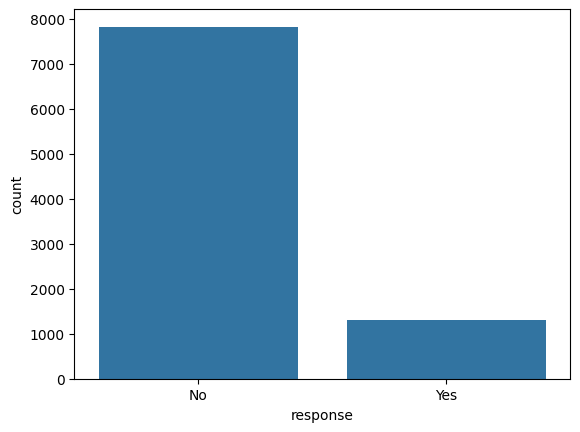

In [15]:
sns.countplot(x=data.response);

#### Show a plot of the response rate by the sales channel.

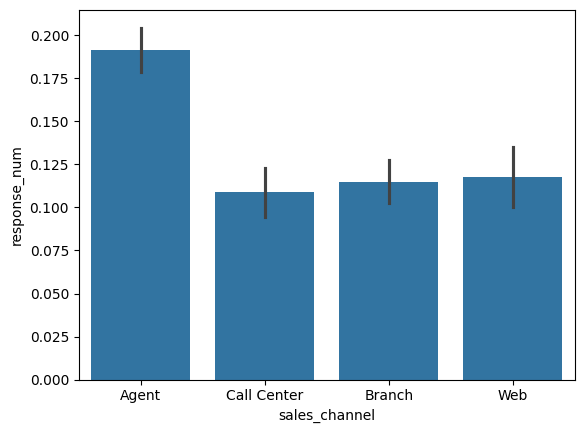

In [62]:
barplot = sns.barplot(x="sales_channel", y="response_num", data=data)

#### Show a plot of the response rate by the total claim amount

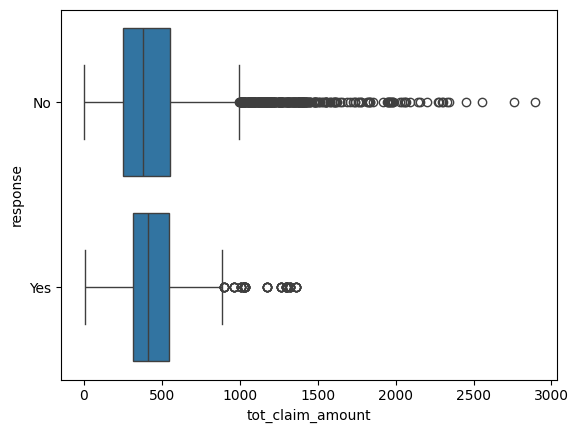

In [17]:
sns.boxplot(x="tot_claim_amount", y="response", data=data);
#there is much more variability in those who did not have a response

#### Show a plot of the response rate by income

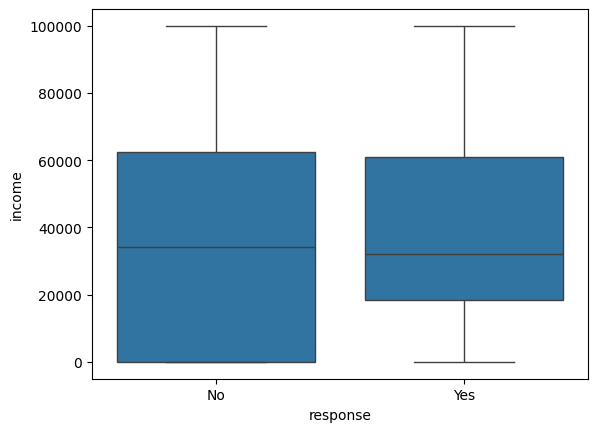

In [18]:
sns.boxplot(x="response", y="income", data=data);

#### Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`

In [42]:
data.dtypes #we can see here which variables are numeric (float, int) or categorical (object)

unnamed: 0                         int64
customer                          object
state                             object
customer lifetime value          float64
response                          object
coverage                          object
education                         object
effective to date                 object
employmentstatus                  object
gender                            object
income                             int64
location code                     object
marital status                    object
monthly premium auto               int64
months since last claim          float64
months since policy inception      int64
number of open complaints        float64
number of policies                 int64
policy type                       object
policy                            object
renew offer type                  object
sales channel                     object
total claim amount               float64
vehicle class                     object
vehicle size    

In [18]:
numerical=data.select_dtypes(include = np.number).head()
categorical=data.select_dtypes(include=['object'])

In [ ]:
len(data.columns) #26 columns
len(categorical.columns)#16 columns
len(numerical.columns) #10 columns 

#we considered all variables from data either in categorical or numerical dfs! --> good

In [65]:
numerical

,unnamed: 0,cust_lifetime_value,income,month_prem_auto,months_last_claim,months_policy_incep,n_opencompl,n_policies,tot_claim_amount,response_num
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,0
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331,0
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,0
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
6,6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,0


In [66]:
categorical

,customer,state,response,coverage,education,eff_date,employmentstatus,gender,loc_code,marital_status,policy_type,policy,renew_offer,sales_channel,vehic_class,vehic_size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
6,IW72280,California,No,Basic,Doctor,2/14/11,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,1/7/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
10904,QI63521,Nevada,No,Basic,High School or Below,2/24/11,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize


In [67]:
numerical.columns

Index(['unnamed: 0', 'cust_lifetime_value', 'income', 'month_prem_auto',
       'months_last_claim', 'months_policy_incep', 'n_opencompl', 'n_policies',
       'tot_claim_amount', 'response_num'],
      dtype='object')

####  Now we will try to check the distributions of the numerical variables visually

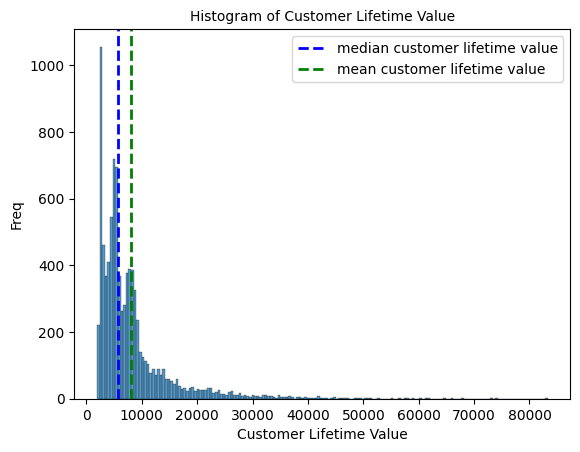

In [123]:
# histogram of customer lifetime value
graf=sns.histplot(data.cust_lifetime_value)
graf.axvline(data.cust_lifetime_value.median(),
            c="blue",
            linewidth= 2.,
            linestyle='--',
            label='median customer lifetime value') # we use the median to reflect the central measure as the variable is (positively) skewed

graf.axvline(data.cust_lifetime_value.mean(),
            c="green",
            linewidth= 2.,
            linestyle='--',
            label='mean customer lifetime value') # when comparing to the mean, the mean is more to the right because of the positive skewness

plt.title('Histogram of Customer Lifetime Value', size=10)
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Freq')
plt.legend()
plt.show()

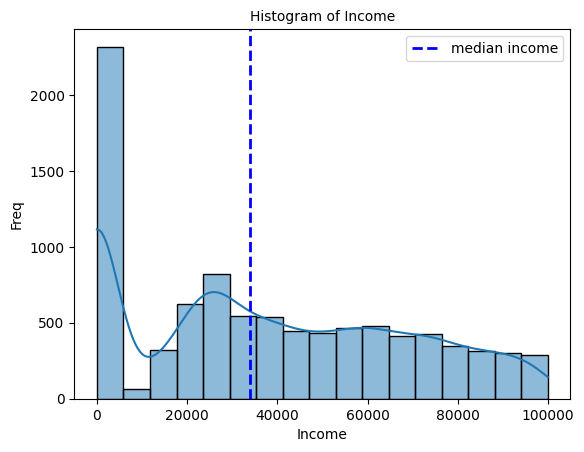

In [118]:
# histogram of income

graf = sns.histplot(x=data.income, kde=True)
graf.axvline(data.income.median(),
            c="blue",
            linewidth= 2.,
            linestyle='--',
            label='median income') # median line (skewed)

plt.title('Histogram of Income', size=10)
plt.xlabel('Income')
plt.ylabel('Freq')
plt.legend()
plt.show()



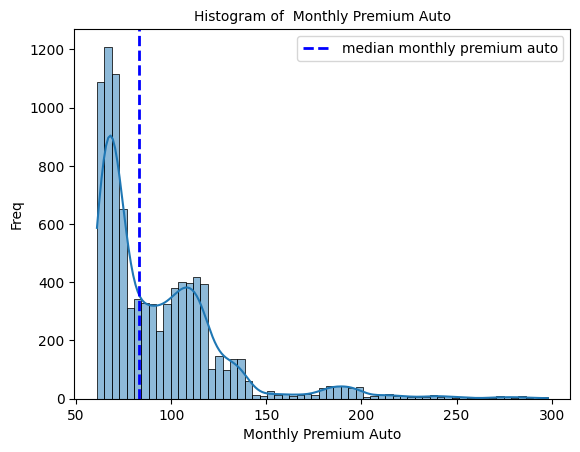

In [120]:
# histogram of monthly premium auto
graf=sns.histplot(data.month_prem_auto, kde=True)
graf.axvline(data.month_prem_auto.median(),
            c="blue",
            linewidth= 2.,
            linestyle='--',
            label='median monthly premium auto') # median line (skewed)


plt.title('Histogram of  Monthly Premium Auto', size=10)
plt.xlabel('Monthly Premium Auto')
plt.ylabel('Freq')
plt.legend()
plt.show()

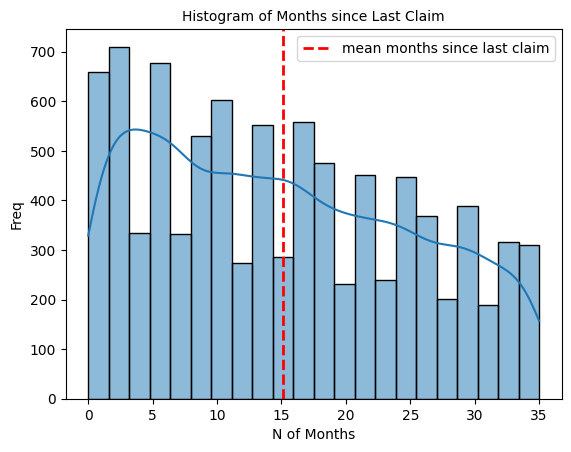

In [108]:
# histogram of months since last claim
graf = sns.histplot(data.months_last_claim, kde=True)
graf.axvline(data.months_last_claim.mean(),
            c="red",
            linewidth= 2.,
            linestyle='--',
            label='mean months since last claim') # mean line

plt.title('Histogram of Months since Last Claim', size=10)
plt.xlabel('N of Months')
plt.ylabel('Freq')
plt.legend()
plt.show()

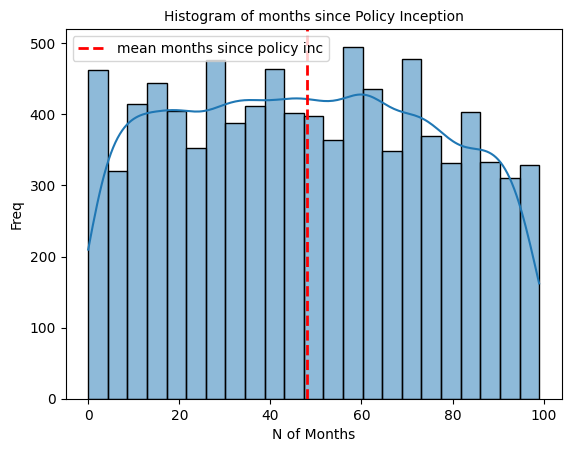

In [111]:
# histogram of months since policy inception
graf=sns.histplot(data.months_policy_incep, kde=True)
graf.axvline(data.months_policy_incep.mean(),
            c="red",
            linewidth= 2.,
            linestyle='--',
            label='mean months since policy inc') # mean line

plt.title('Histogram of months since Policy Inception', size=10)
plt.xlabel('N of Months')
plt.ylabel('Freq')
plt.legend()
plt.show()

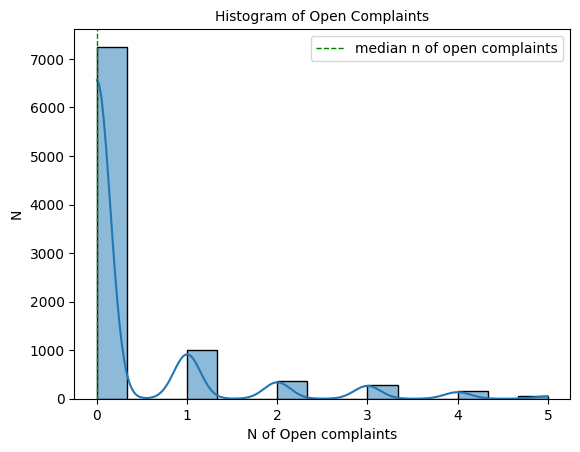

In [121]:
# histogram of number of open complaints
graf=sns.histplot(data.n_opencompl, kde=True)
graf.axvline(data.n_opencompl.median(),
            c="green",
            linewidth= 1.,
            linestyle='--',
            label='median n of open complaints') # median line (skewed)

plt.title('Histogram of Open Complaints', size=10)
plt.xlabel('N of Open complaints')
plt.ylabel('N')
plt.legend()
plt.show()

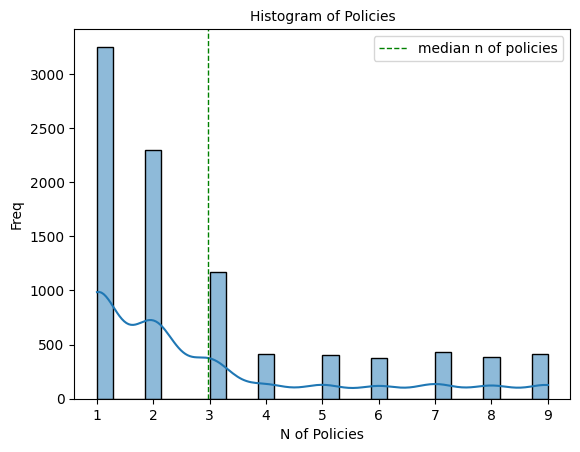

In [113]:
# histogram of number of policies

graf=sns.histplot(data.n_policies, kde=True)
graf.axvline(data.n_policies.mean(),
            c="green",
            linewidth= 1.,
            linestyle='--',
            label='median n of policies') # median line

plt.title('Histogram of Policies', size=10)
plt.xlabel('N of Policies')
plt.ylabel('Freq')
plt.legend()
plt.show()

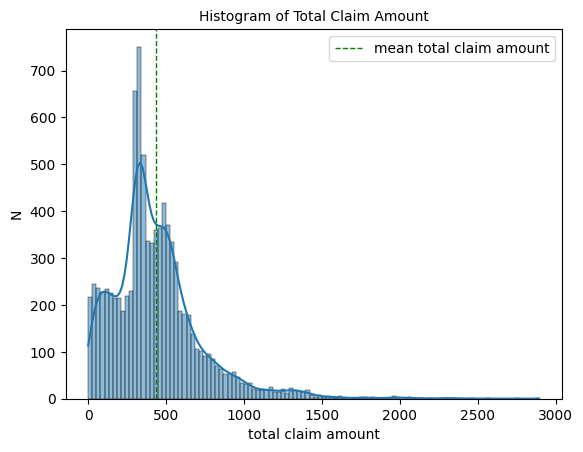

In [94]:
# histogram of total claim amount
graf=sns.histplot(data.tot_claim_amount, kde=True)
graf.axvline(data.tot_claim_amount.mean(),
            c="green",
            linewidth= 1.,
            linestyle='--',
            label='mean total claim amount') # mean line

plt.title('Histogram of Total Claim Amount', size=10)
plt.xlabel('total claim amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<Axes: xlabel='response_num', ylabel='Count'>

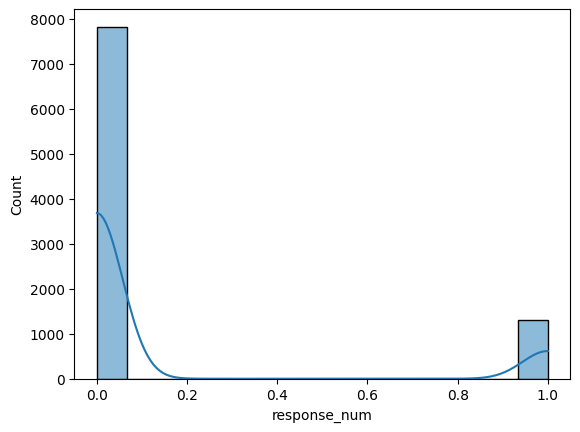

In [50]:
# histogram of response_num
sns.histplot(data.response_num, kde=True)

#### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 

#### Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features.

In [126]:
numerical.columns

Index(['unnamed: 0', 'cust_lifetime_value', 'income', 'month_prem_auto',
       'months_last_claim', 'months_policy_incep', 'n_opencompl', 'n_policies',
       'tot_claim_amount', 'response_num'],
      dtype='object')

In [129]:
data[['cust_lifetime_value', 'income', 'month_prem_auto',
       'months_last_claim', 'months_policy_incep', 'n_opencompl', 'n_policies',
       'tot_claim_amount', 'response_num']].corr()

#the maximum correlation here is between 'number of open complaints' and 'total claim amoun' (0.69) 
#followed by 'monthly premium auto' and 'customer lifetime value' (0.39)
#apart from those, there is no such high correlation (>0.9) so we will drop no features

#a great correlation would exist between response and response_num as one is derived from the other directly (string vs. dummy variable) but does not apply here.

,cust_lifetime_value,income,month_prem_auto,months_last_claim,months_policy_incep,n_opencompl,n_policies,tot_claim_amount,response_num
cust_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.008930
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.011932
month_prem_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.010966
months_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.016597
months_policy_incep,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.002952
n_opencompl,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.009881
n_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,-0.020891
tot_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.016877
response_num,-0.008930,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.016877,1.000000


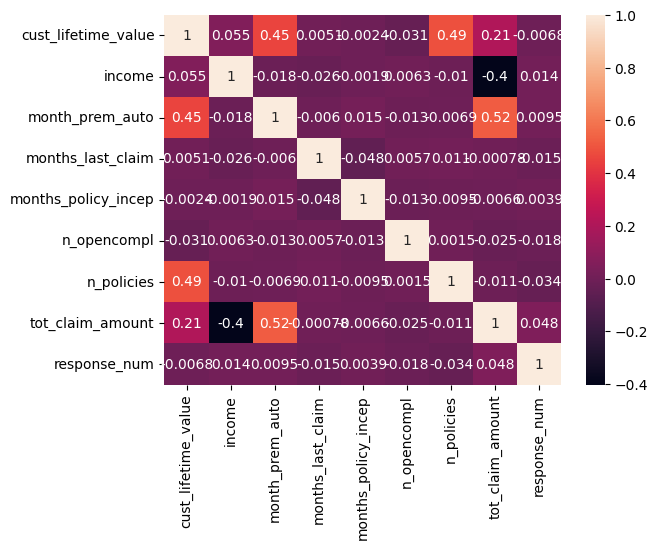

In [130]:
correl = data[['cust_lifetime_value', 'income', 'month_prem_auto',
       'months_last_claim', 'months_policy_incep', 'n_opencompl', 'n_policies',
       'tot_claim_amount', 'response_num']].corr(method = 'spearman')
sns.heatmap(correl, annot = True)
plt.show() # won't account for non-linear relations

#we use Spearman correlation as Pearson is very sensitive to outliers. When the distributions are not normal, better to use Spearman correlation, as in this case